In [30]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("oilAndGas.csv")
df.fillna(0, inplace=True)
df.drop(['oil_gas_valuePOP_nom','oil_gas_valuePOP_2014','iso3numeric','id','eiacty','net_gas_exports_valuePOP','net_oil_gas_exports_valuePOP','net_gas_exports_mboe','oil_value_nom','pop_maddison','sovereign','net_gas_exports_bcf','net_gas_exports_value','net_oil_exports_valuePOP','mult_nom_2014','mult_2000_2014','oil_gas_value_2000','oil_gas_value_2014','oil_gas_valuePOP_2000','mult_nom_2000','gas_price_2000_mboe','gas_price_2000','oil_exports','net_oil_exports','net_oil_exports_mt','net_oil_exports_value','gas_exports','population'],axis=1,inplace=True)

<AxesSubplot:>

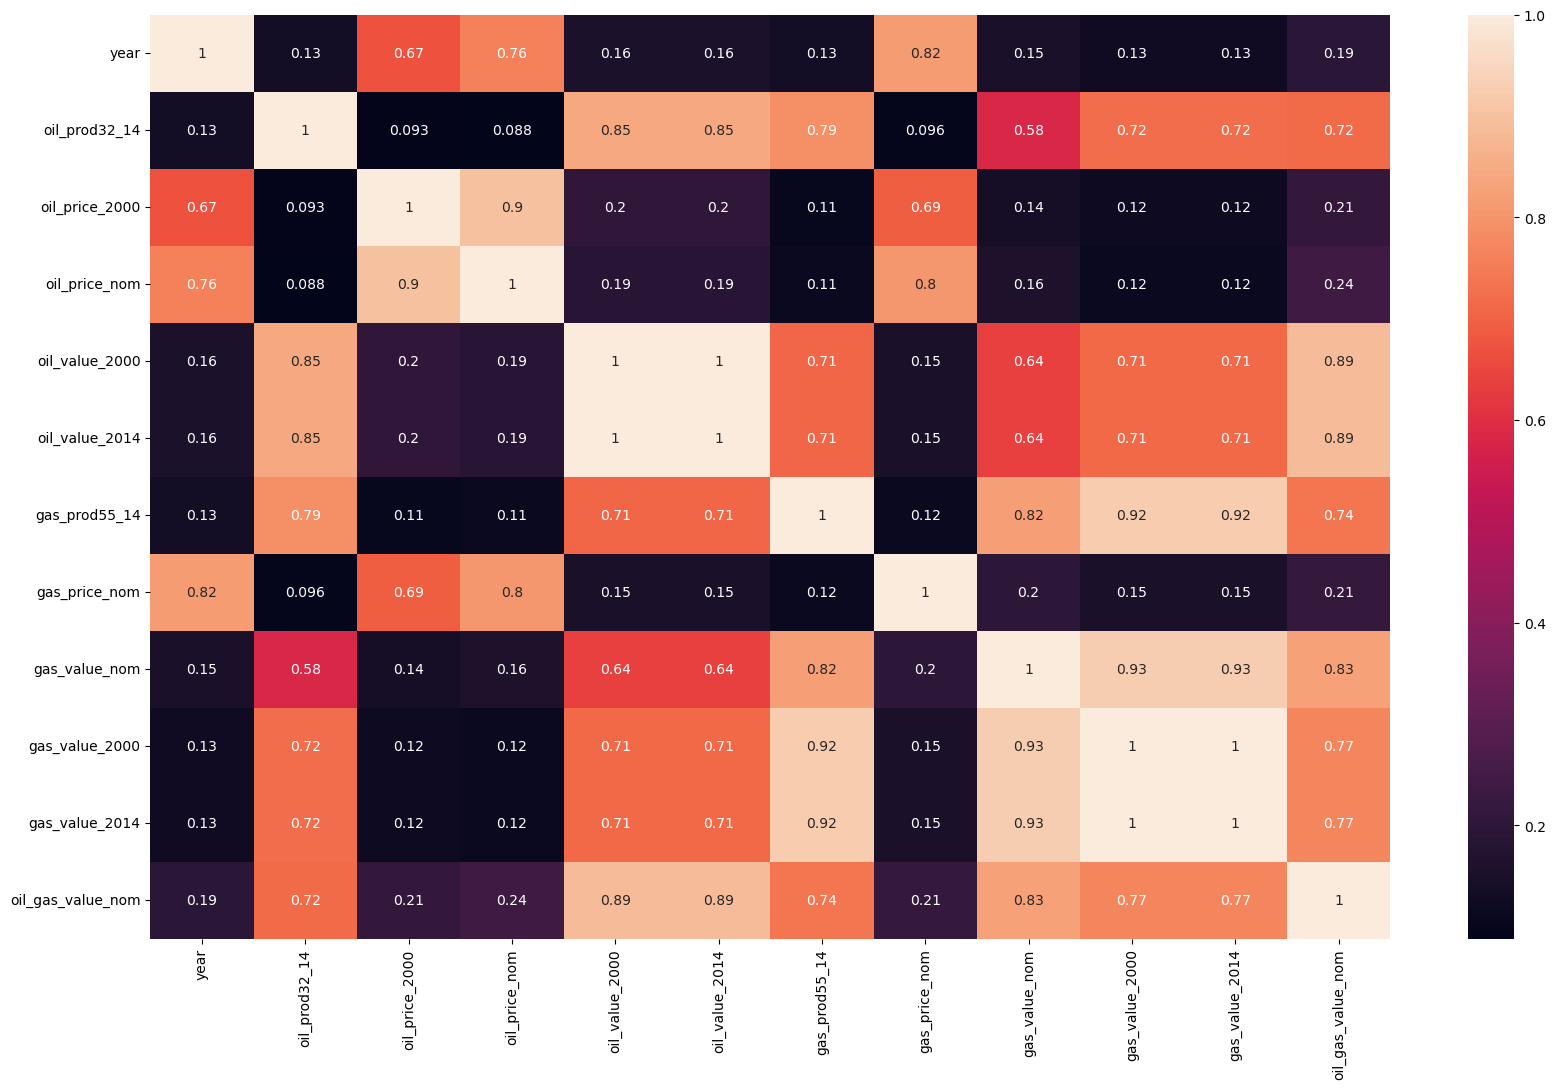

In [34]:
import matplotlib.pyplot as plt
cor = df.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cor,annot=True)

In [25]:
df.head()

,cty_name,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,gas_price_2000,...,gas_value_nom,gas_value_2000,gas_value_2014,oil_gas_value_nom,oil_exports,net_oil_exports,net_oil_exports_mt,net_oil_exports_value,gas_exports,population
0,Afghanistan,1932,0.0,10.860860,0.87,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1933,0.0,8.815239,0.67,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1934,0.0,12.715790,1.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1935,0.0,12.039690,0.97,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1936,0.0,13.383210,1.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
names=[]
for i in df.cty_name:
    names.append(i)
names = [*set(names)]
names = sorted(names)

In [76]:
def run(name):
    dfTest = df[(df['cty_name'] == name)]
    df_min_max_scaled = dfTest.copy()
    df_min_max_scaled.drop(['cty_name'],axis=1,inplace=True)
    for column in df_min_max_scaled.columns:
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
    #print(len(df_min_max_scaled))
    sums, y, m1, m2 = getBest(df_min_max_scaled)
    print(sums)
    print(y)   
    print(m1) 
    print(m2)  

def findSumsM1(a,b,c,df):
    sums=0
    for i in range(0,len(df)-1):
        #print(i)
        sums += abs((abs((a*df.iat[i,2])+(b*df.iat[i,2])+(c))/((a**2+b**2)**0.5)))
    return sums

def getBestSlopeM1(c,df):
    compSums=[]
    x=-1.0
    placeHold=[]
    for i in range(100):
        compSums.append(findSumsM1(i,-1,c,df))
        placeHold.append(x)
        x += 0.02
    ret = compSums[0]
    ret1 = 0.00
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = placeHold[i+1]
    return ret1

def findSumsM2(a,b,c,df):
    sums=0
    for i in range(0,len(df)-1):
        #print(i)
        sums += abs((abs((a*df.iat[i,1])+(b*df.iat[i,9])+(c))/((a**2+b**2)**0.5)))
    return sums

def getBestSlopeM2(c,df):
    compSums=[]
    x=-1.0
    placeHold=[]
    for i in range(100):
        compSums.append(findSumsM2(i,-1,c,df))
        placeHold.append(x)
        x += 0.02
    ret = compSums[0]
    ret1 = 0.00
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = placeHold[i+1]
    return ret1

def calc(c,df):
    m1=getBestSlopeM1(c,df)
    m2=getBestSlopeM2(c,df)
    print(m1,m2)
    sums=0
    for i in range(0,len(df)-1):
        #print(i)
        sums += abs(m1*df.iat[i,2]+m2*df.iat[i,1]+c-1)/((m1**2+m2**2+1)**0.5)
    return sums, m1,m2

def getBest(df):
    #print(len(df))
    bests=[]
    ints=[]
    m1s=[]
    m2s=[]
    x=-1.0
    for i in range(100):
        if i == 50:
            print('halfway')
            print()
        sumx, m1,m2 = calc(x,df)
        ints.append(x)
        bests.append(sumx)
        m1s.append(m1)
        m2s.append(m2)
        x+=0.02
    ret=bests[0]
    index=0
    for i in range(len(bests)-1):
        if bests[i+1]<ret:
            ret=bests[i+1]
            index=i
    return ret, ints[index-1],m1s[index-1],m2s[index-1]

In [78]:
run('Afghanistan')

halfway

nan
0.9800000000000012
0.9800000000000012
0.0


In [ ]:
for i in names:
    print(i)
    run(i)
    print()